<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;">[<img src="http://project.inria.fr/saclaycds/files/2017/02/logoUPSayPlusCDS_990.png" width="70%">](http://www.datascience-paris-saclay.fr)</td>
  </tr>
</table> 
</div>


# [RAMP](https://www.ramp.studio/problems/solar_wind) on detecting Solar storms

_Joris van den Bossche, Gautier Nguyen, Nicolas Aunai & Balazs Kegl_

Interplanetary Coronal Mass Ejections (ICMEs) result from magnetic instabilities occurring in the Sun atmosphere, and interact with the planetary environment and may result in intense internal activity such as strong particle acceleration, so-called geomagnetic storms and geomagnetic induced currents. These effects have serious consequences regarding space and ground technologies and understanding them is part of the so-called space weather discipline.

ICMEs signatures as measured by in-situ spacecraft come as patterns in time series of the magnetic field, the particle density, bulk velocity, temperature etc. Although well visible by expert eyes, these patterns have quite variable characteristics which make naive automatization of their detection difficult.

The goal of this RAMP is to detect Interplanetary Coronal Mass Ejections (ICMEs) in the data measured by in-situ spacecraft.


![](img/illustration_solar_wind.png)




ICMEs are the interplanetary counterpart of Coronal Mass Ejections (CMEs), the expulsion of large quantities of plasma and magnetic field that result from magnetic instabilities occurring in the Sun atmosphere (Kilpua et al. (2017) and references therein).  They travel at several hundred or thousands of kilometers per second and, if in their trajectory, can reach Earth in 2-4 days.

ICMEs interact with the planetary environment and may result in intense internal activity such as strong particle acceleration, so-called geomagnetic storms and geomagnetic induced currents. These effects have serious consequences regarding space and ground technologies and understanding them is part of the so-called space weather discipline.
ICMEs signatures as measured by in-situ spacecraft thus come as patterns in time series of the magnetic field, the particle density, bulk velocity, temperature etc. Although well visible by expert eyes, these patterns have quite variable characteristics which makes naive automatization of their detection difficult. To overcome this problem, Lepping et al. (2005) proposed an automatic detection method based on manually set thresholds on a set of physical parameters. However, the method allowed to detect only 60 % of the ICMEs with a high percentage of false positives (60%). Moreover, because of the subjectivity induced by the manually set threshold, the method had difficulties to create a reproducible and constant ICME catalog.

This challenge proposes to design the best algorithm  to detect ICMEs from the most complete ICME catalog containing 657 events. We propose to give to the users a subset of this large dataset in order to test and calibrate their algorithm. We provide in-situ data measurement by the WIND spacecraft between 1997 and 2016, that we sampled to a 10 minutes resolution and for which we computed three additional features that proved to be useful in the visual identification of ICMEs. Using an appropriate metric, we will compare the true solution to the estimation. The goal is to provide an ICME catalog containing less than 10% of false positives while recording as much existing event as possible.

Formally, each instance will consist of a measurement of various physical parameters in the interplanetary medium. The training set will contain data measurement from 1997 to 2010 and the beginning and ending dates of the 438 ICMEs that were measured in this period : tstart and tend.

## Table of Content

0. [Prerequisites](#Software-prerequisites)
1. [Introduction about the competition](#Introduction:-what-is-this-challenge-about)
3. [The data](#The-data)
4. [Workflow](#Workflow)
5. [Evaluation](#Evaluation)
6. [Submission](#Submitting-to-the-online-challenge:-ramp.studio)
7. [More information](#More-information)
8. [Questions](#Question)

**To download and run this notebook**: download the [full starting kit](https://github.com/ramp-kits/solar_wind/archive/master.zip), with all the necessary files.

## Getting started with the RAMP starting kit

### Software prerequisites

This starting kit requires the following dependencies:

* `numpy`
* `pandas`
* `pyarrow`
* `scikit-learn`
* `matplolib`
* `jupyter`
* `imbalanced-learn`

We recommend to install those using `conda` (using the `Anaconda` distribution).

In addition, `ramp-workflow` is needed. This can be installed from the master branch on GitHub:

    python -m pip install https://api.github.com/repos/paris-saclay-cds/ramp-workflow/zipball/master

### Getting the data

The public train and test data can be downloaded by running from the root of the starting kit:

    python download_data.py


## The data

We start with inspecting the training data:

In [1]:
from problem import get_train_data

data_train, labels_train = get_train_data()

In [2]:
data_train.head()

,B,Bx,Bx_rms,By,By_rms,Bz,Bz_rms,Na_nl,Np,Np_nl,...,Range F 8,Range F 9,V,Vth,Vx,Vy,Vz,Beta,Pdyn,RmsBob
1997-10-01 00:00:00,6.584763,3.753262,2.303108,0.966140,2.602693,-5.179685,2.668414,2.290824,23.045732,24.352797,...,2.757919e+09,2.472087e+09,378.313934,80.613098,-351.598389,-138.521454,6.956387,7.641340,5.487331e-15,0.668473
1997-10-01 00:10:00,6.036456,0.693559,1.810752,-0.904843,2.165570,-1.944006,2.372931,2.119593,23.000492,20.993362,...,3.365612e+09,3.087122e+09,350.421021,69.919327,-331.012146,-110.970787,-21.269474,9.149856,4.783776e-15,0.753848
1997-10-01 00:20:00,5.653682,-4.684786,0.893058,-2.668830,0.768677,1.479302,1.069266,2.876815,20.676191,17.496399,...,1.675611e+09,1.558640e+09,328.324493,92.194435,-306.114899,-117.035202,-13.018987,11.924199,3.719768e-15,0.282667
1997-10-01 00:30:00,5.461768,-4.672382,1.081638,-2.425630,0.765681,1.203713,0.934445,2.851195,20.730188,16.747108,...,1.589037e+09,1.439569e+09,319.436859,94.230705,-298.460938,-110.403969,-20.350492,16.032987,3.525211e-15,0.304713
1997-10-01 00:40:00,6.177846,-5.230110,1.046126,-2.872561,0.635256,1.505010,0.850657,3.317076,20.675701,17.524536,...,1.812308e+09,1.529260e+09,327.545929,89.292595,-307.303070,-111.865845,-12.313167,10.253789,3.694283e-15,0.244203


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 509834 entries, 1997-10-01 00:00:00 to 2007-12-31 23:50:00
Data columns (total 33 columns):
B             509834 non-null float32
Bx            509834 non-null float32
Bx_rms        509834 non-null float32
By            509834 non-null float32
By_rms        509834 non-null float32
Bz            509834 non-null float32
Bz_rms        509834 non-null float32
Na_nl         509834 non-null float32
Np            509834 non-null float32
Np_nl         509834 non-null float32
Range F 0     509834 non-null float32
Range F 1     509834 non-null float32
Range F 10    509834 non-null float32
Range F 11    509834 non-null float32
Range F 12    509834 non-null float32
Range F 13    509834 non-null float32
Range F 14    509834 non-null float32
Range F 2     509834 non-null float32
Range F 3     509834 non-null float32
Range F 4     509834 non-null float32
Range F 5     509834 non-null float32
Range F 6     509834 non-null float32
Range F 7     50983

In [4]:
labels_train.head()

1997-10-01 00:00:00    0
1997-10-01 00:10:00    0
1997-10-01 00:20:00    0
1997-10-01 00:30:00    0
1997-10-01 00:40:00    0
Name: label, dtype: int64

### An example ICME "solar storm" event

ICMEs signatures as measured by in-situ spacecraft thus come as patterns in time series of the magnetic field, the particle density, bulk velocity, temperature etc. 

Let's visualize a typical event to inspect the patterns.

In [5]:
%matplotlib inline

In [6]:
def plotEvent(start, end, data, delta=36):
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    subset = data[(start - pd.Timedelta(hours=delta)):(end + pd.Timedelta(hours=delta))]
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,15), sharex=True)
    
    # plot 1
    axes[0].plot(subset.index, subset['B'], color='gray', linewidth=2.5)
    axes[0].plot(subset.index, subset['Bx'])
    axes[0].plot(subset.index, subset['By'])
    axes[0].plot(subset.index, subset['Bz'])
    axes[0].legend(['B', 'Bx', 'By', 'Bz (nT)'],loc='center left', bbox_to_anchor=(1, 0.5))
    axes[0].set_ylabel('Magnetic Field (nT)')

    # plot 2
    axes[1].plot(subset.index, subset['Beta'], color='gray')
    axes[1].set_ylim(-0.05, 1.7)
    axes[1].set_ylabel('Beta')

    # plot 3
    axes[2].plot(subset.index, subset['V'], color='gray')
    axes[2].set_ylabel('V(km/s)')
    #axes[2].set_ylim(250, 500)
    
    # plot 4
    axes[3].plot(subset.index, subset['Vth'], color='gray')
    axes[3].set_ylabel('$V_{th}$(km/s)')
    #axes[3].set_ylim(5, 60)

    # add vertical lines
    for ax in axes:
        ax.axvline(start, color='k')
        ax.axvline(end, color='k')
        ax.xaxis.grid(True, which="minor")
    
    return fig, axes

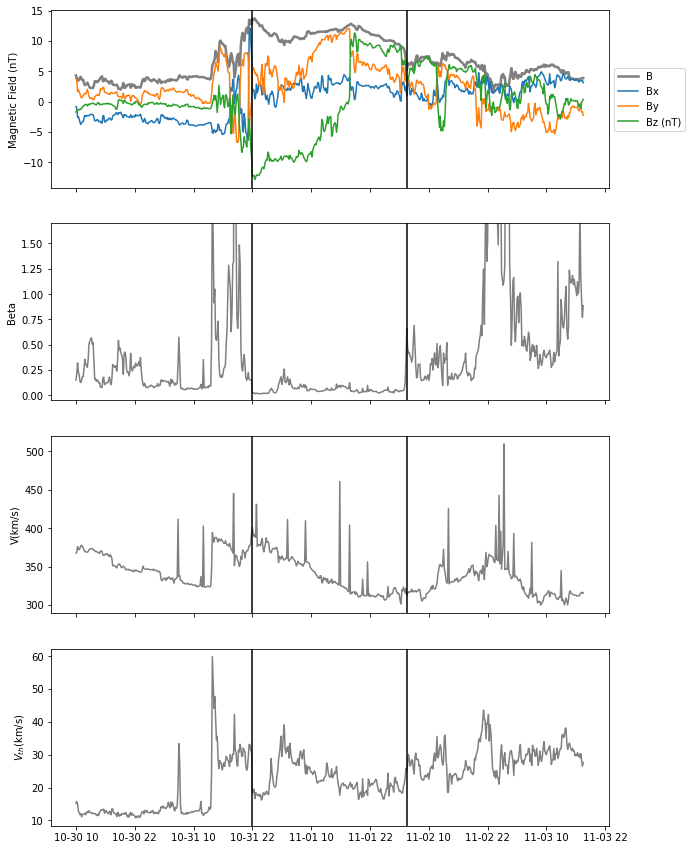

In [7]:
plotEvent(pd.Timestamp("2001-10-31 22:00:00"), pd.Timestamp("2001-11-02 05:30:00"), data_train);

## Workflow

### The model to submit

The submission consists of two files: `feature_extractor.py` which defines a `FeatureExtractor` class, and `classifier.py` which defines a `Classifier` class

- `FeatureExtractor` can (optionally) hold code to calculate and add additional features.
- `Classifier` fits the model and predicts on (new) data, as outputted by the `FeatureExtractor`. The prediction should be in the form of a (n_samples, 2) array with the probabilities of the two classes.

---

An example `FeatureExtractor`, adding an additional feature based on a moving window to include some time-aware features:

In [132]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin



class FeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X_df, y):
        return self

    def transform(self, X_df):
        X_df_new = X_df.copy()
        X_df_new = compute_rolling_std(X_df_new, 'Beta', '2h')
        return X_df_new


def compute_rolling_std(data, feature, time_window, center=False):
    """
    For a given dataframe, compute the standard deviation over
    a defined period of time (time_window) of a defined feature

    Parameters
    ----------
    data : dataframe
    feature : str
        feature in the dataframe we wish to compute the rolling mean from
    time_indow : str
        string that defines the length of the time window passed to `rolling`
    center : bool
        boolean to indicate if the point of the dataframe considered is
        center or end of the window
    """
    name = '_'.join([feature, time_window, 'std'])
    data[name] = data[feature].rolling(time_window, center=center).std()
    data[name] = data[name].ffill().bfill()
    return data


And an example `Classifier` doing a standard scaling and Logistic regression for the classification:

In [131]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


class Classifier(BaseEstimator):
    def __init__(self):
        self.model = make_pipeline(StandardScaler(), LogisticRegression())

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict_proba(self, X):
        return self.model.predict_proba(X)


## Submitting to the online challenge: [ramp.studio](http://ramp.studio)

Once you found a good model, you can submit them to [ramp.studio](http://www.ramp.studio) to enter the online challenge. First, if it is your first time using the RAMP platform, [sign up](http://www.ramp.studio/sign_up), otherwise [log in](http://www.ramp.studio/login). Then sign up to the event [solar_wind](http://www.ramp.studio/events/solar_wind). Sign up for the event. Both signups are controled by RAMP administrators, so there **can be a delay between asking for signup and being able to submit**.

Once your signup request is accepted, you can go to your [sandbox](http://www.ramp.studio/events/solar_wind/sandbox) and copy-paste. You can also create a new starting-kit in the `submissions` folder containing both `feature_extractor.py` and `classifier.py` and upload those file directly. You can check the starting-kit ([`feature_extractor.py`](/edit/submissions/starting_kit/feature_extractor.py) and [`classifier.py`](/edit/submissions/starting_kit/classifier.py)) for an example. The submission is trained and tested on our backend in the similar way as `ramp_test_submission` does it locally. While your submission is waiting in the queue and being trained, you can find it in the "New submissions (pending training)" table in [my submissions](http://www.ramp.studio/events/solar_wind/my_submissions). Once it is trained, you get a mail, and your submission shows up on the [public leaderboard](http://www.ramp.studio/events/solar_wind/leaderboard). 
If there is an error (despite having tested your submission locally with `ramp_test_submission`), it will show up in the "Failed submissions" table in [my submissions](http://www.ramp.studio/events/solar_wind/my_submissions). You can click on the error to see part of the trace.

After submission, do not forget to give credits to the previous submissions you reused or integrated into your submission.

The data set we use at the backend is usually different from what you find in the starting kit, so the score may be different.

The usual way to work with RAMP is to explore solutions, add feature transformations, select models, perhaps do some AutoML/hyperopt, etc., _locally_, and checking them with `ramp_test_submission`. The script prints mean cross-validation scores 

The official score in this RAMP (the first score column after "historical contributivity" on the [leaderboard](http://www.ramp.studio/events/solar_wind/leaderboard)) is the Log loss (`pw_ll`). When the score is good enough, you can submit it at the RAMP.

In [ ]:
!ramp_test_submission --submission starting_kit

## More information

You can find more information in the [README](https://github.com/paris-saclay-cds/ramp-workflow/blob/master/README.md) of the [ramp-workflow library](https://github.com/paris-saclay-cds/ramp-workflow).

## Questions

Questions related to the starting kit should be asked on the [issue tracker](https://github.com/ramp-kits/solar_wind/issues). The RAMP site administrators can be pinged at the [RAMP slack team](https://ramp-studio.slack.com/shared_invite/MTg1NDUxNDAyNDk2LTE0OTUzOTcwMDQtMThlOWY1NWU0Mg) in the #solar_wind channel.